In [168]:
import imageio
import imgaug as ia
import numpy as np
import os
import json
from imgaug.augmentables.polys import Polygon, PolygonsOnImage
import imgaug.augmenters as iaa
import copy
%matplotlib inline

In [167]:
# json 파일 불러오기
with open("via_region_data.json", "r") as f:
    content = json.load(f)

# content

In [58]:
# 경로 설정해주기
path_dir = os.path.abspath("./")
path_dir

'C:\\Users\\huijeong\\Desktop\\imgaug\\MyTest'

In [69]:
# 해당 경로의 모든 이미지파일(jpg) 불러오기
imageNames = [_ for _ in os.listdir(path_dir) if _.split(".")[-1] in ['jpg']]
imageNames

['fge4f43wtre4rtfewre.jpg', 'fge4f43wtre4rtfewre_flip.jpg']

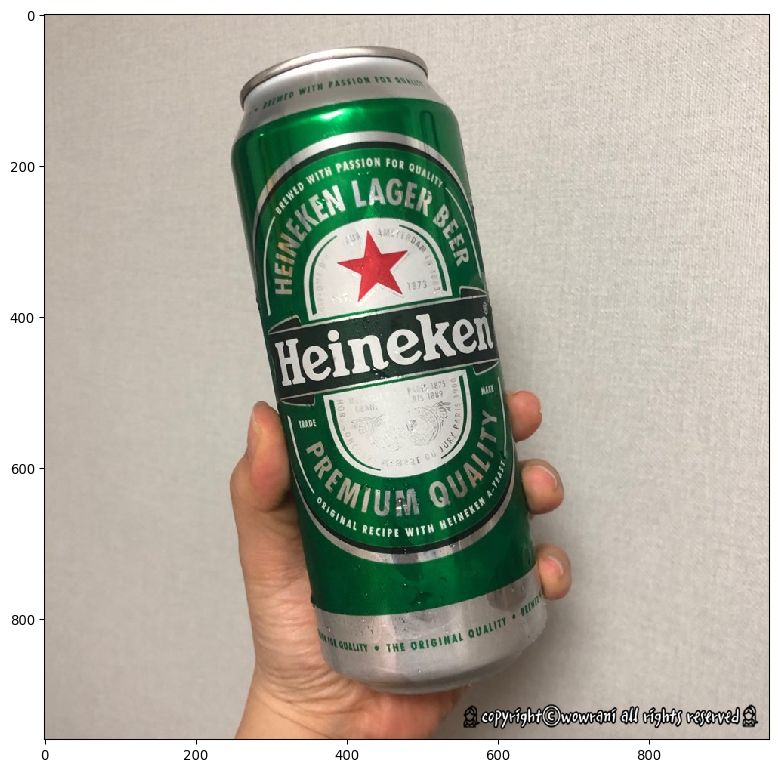

In [89]:
# 파일 이름 불러오기
imageName = imageNames[0]

# 이미지 불러오기
image = imageio.imread(imageName)

# 이미지 보여주기
ia.imshow(image)

In [72]:
# # 이미지 resize
# image = ia.imresize_single_image(image, 1.0)

# # 이미지 크기 출력
# print(image.shape)

# # 이미지 보여주기
# ia.imshow(image)

In [144]:
# x좌표
xx = content["fge4f43wtre4rtfewre.jpg363712"]["regions"]["0"]["shape_attributes"]["all_points_x"]

# y좌표
yy = content["fge4f43wtre4rtfewre.jpg363712"]["regions"]["0"]["shape_attributes"]["all_points_y"]

# x, y좌표
point = [_ for _ in zip(xx, yy)]
        
# 영역 그리기
seg = Polygon(point)
seg

Polygon([(x=265.000, y=123.000), (x=247.000, y=173.000), (x=374.000, y=867.000), (x=427.000, y=892.000), (x=463.000, y=899.000), (x=524.000, y=896.000), (x=576.000, y=881.000), (x=619.000, y=865.000), (x=645.000, y=835.000), (x=670.000, y=799.000), (x=545.000, y=127.000), (x=508.000, y=86.000), (x=509.000, y=64.000), (x=477.000, y=45.000), (x=420.000, y=41.000), (x=366.000, y=52.000), (x=320.000, y=66.000), (x=279.000, y=82.000), (x=259.000, y=102.000), (x=256.000, y=125.000)] (20 points), label=None)

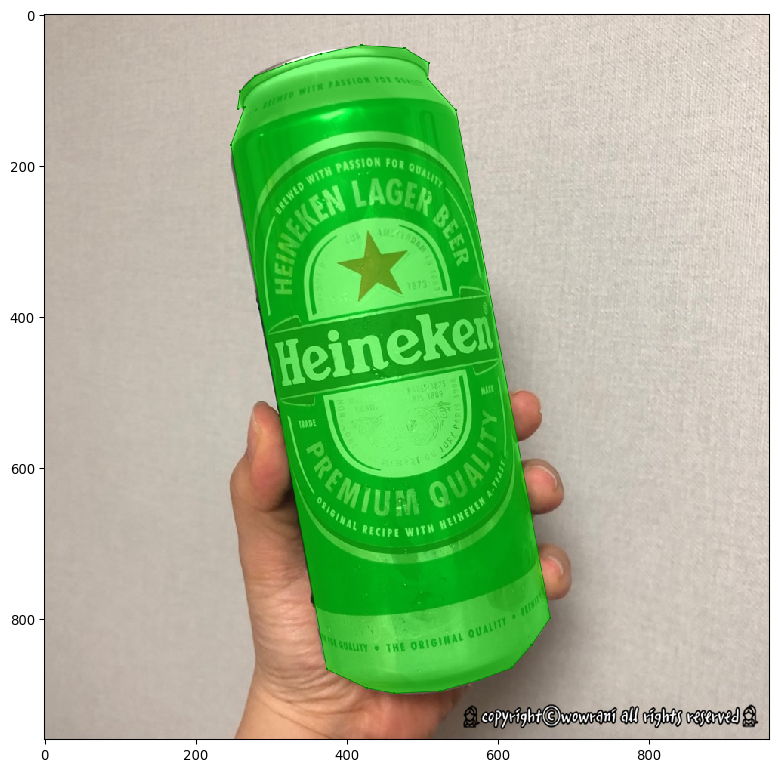

In [83]:
# 기존 이미지 복사
image_polys = np.copy(image)

# 복사한 이미지에 영역 얹기
image_polys = seg.draw_on_image(image_polys) # , alpha_face=0.2, size_points=7

# 이미지+seg 보여주기
ia.imshow(image_polys)

In [84]:
# # aug = iaa.Sequential([
# #     #iaa.Affine(translate_percent={"x": 0.2, "y": 0.1}),
# #     iaa.Fliplr(1.0)
# # ])

# image_aug, psoi_aug = aug(image=image, polygons=psoi)

# #ia.imshow(psoi_aug.draw_on_image(image_aug, alpha_face=0.2, size_points=7))
# ia.imshow(psoi_aug.draw_on_image(image_aug, alpha_face=0.2))

In [101]:
# aug 랜덤변수 시드1에 고정
ia.seed(1)

# 이미지 + seg 하나로 만들기
psoi = ia.PolygonsOnImage([seg], shape=image.shape)

# flip 정의
aug = iaa.Fliplr(1.0)

# augmentation(flip)을 한 이미지, 좌표
image_aug, seg_aug = aug(image=image, polygons=psoi)

In [102]:
seg_aug

PolygonsOnImage([Polygon([(x=694.000, y=123.000), (x=712.000, y=173.000), (x=585.000, y=867.000), (x=532.000, y=892.000), (x=496.000, y=899.000), (x=435.000, y=896.000), (x=383.000, y=881.000), (x=340.000, y=865.000), (x=314.000, y=835.000), (x=289.000, y=799.000), (x=414.000, y=127.000), (x=451.000, y=86.000), (x=450.000, y=64.000), (x=482.000, y=45.000), (x=539.000, y=41.000), (x=593.000, y=52.000), (x=639.000, y=66.000), (x=680.000, y=82.000), (x=700.000, y=102.000), (x=703.000, y=125.000)] (20 points), label=None)], shape=(960, 960, 3))

In [109]:
x = seg_aug.polygons[0].xx_int.tolist()
y = seg_aug.polygons[0].yy_int.tolist()

694
712
585
532
496
435
383
340
314
289
414
451
450
482
539
593
639
680
700
703


In [90]:
imageio.imwrite(f"{imageName}_flip.jpg", image_aug[:, :, :])

In [172]:
content

{'fge4f43wtre4rtfewre.jpg363712': {'fileref': '',
  'size': 363712,
  'filename': 'fge4f43wtre4rtfewre.jpg',
  'base64_img_data': '',
  'file_attributes': {},
  'regions': {'0': {'shape_attributes': {'name': 'polygon',
     'all_points_x': [265,
      247,
      374,
      427,
      463,
      524,
      576,
      619,
      645,
      670,
      545,
      508,
      509,
      477,
      420,
      366,
      320,
      279,
      259,
      256,
      265],
     'all_points_y': [123,
      173,
      867,
      892,
      899,
      896,
      881,
      865,
      835,
      799,
      127,
      86,
      64,
      45,
      41,
      52,
      66,
      82,
      102,
      125,
      123]},
    'region_attributes': {'name': 'can'}}}}}

In [176]:
useContent = copy.deepcopy(content)

for _ in useContent:
    newDict = {}
    part = _.split('.')[1]
#     newName = part[0]+"_flip."+part[1]
    
    copyDict = copy.deepcopy(useContent[_])
    imgName = copyDict['filename']
    imgName = imgName.split('.')
    newName = imgName[0]+"_flip."+imgName[1]
    copyDict['filename'] = newName
    copyDict['regions']['0']['shape_attributes']['all_points_x'] = x
    copyDict['regions']['0']['shape_attributes']['all_points_y'] = y
    
    newDict[newName.split('.')[0]+'.'+_.split('.')[1]] = copyDict
    
    content.update(newDict)
    
content

{'fge4f43wtre4rtfewre.jpg363712': {'fileref': '',
  'size': 363712,
  'filename': 'fge4f43wtre4rtfewre.jpg',
  'base64_img_data': '',
  'file_attributes': {},
  'regions': {'0': {'shape_attributes': {'name': 'polygon',
     'all_points_x': [265,
      247,
      374,
      427,
      463,
      524,
      576,
      619,
      645,
      670,
      545,
      508,
      509,
      477,
      420,
      366,
      320,
      279,
      259,
      256,
      265],
     'all_points_y': [123,
      173,
      867,
      892,
      899,
      896,
      881,
      865,
      835,
      799,
      127,
      86,
      64,
      45,
      41,
      52,
      66,
      82,
      102,
      125,
      123]},
    'region_attributes': {'name': 'can'}}}},
 'fge4f43wtre4rtfewre_flip.jpg363712': {'fileref': '',
  'size': 363712,
  'filename': 'fge4f43wtre4rtfewre_flip.jpg',
  'base64_img_data': '',
  'file_attributes': {},
  'regions': {'0': {'shape_attributes': {'name': 'polygon',
     'all_points_

In [177]:
with open("via_region_data_new.json", "w") as f:
    json.dump(content, f)

In [175]:
# json 파일 불러오기
with open("via_region_data.json", "r") as f:
    content = json.load(f)

# content

In [130]:
# x좌표
xx = content["fge4f43wtre4rtfewre.jpg363712"]["regions"]["0"]["shape_attributes"]["all_points_x"]

# y좌표
yy = content["fge4f43wtre4rtfewre.jpg363712"]["regions"]["0"]["shape_attributes"]["all_points_y"]

# x, y좌표 합치기
point = [_ for _ in zip(xx, yy)]

print(content)
# print(xx, yy, sep='\n')
# print(point)

{'fge4f43wtre4rtfewre.jpg363712': {'fileref': '', 'size': 363712, 'filename': 'fge4f43wtre4rtfewre.jpg', 'base64_img_data': '', 'file_attributes': {}, 'regions': {'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [694, 712, 585, 532, 496, 435, 383, 340, 314, 289, 414, 451, 450, 482, 539, 593, 639, 680, 700, 703], 'all_points_y': [123, 173, 867, 892, 899, 896, 881, 865, 835, 799, 127, 86, 64, 45, 41, 52, 66, 82, 102, 125]}, 'region_attributes': {'name': 'can'}}}}, 'fge4f43wtre4rtfewre_flip.jpg363712': {'fileref': '', 'size': 363712, 'filename': 'fge4f43wtre4rtfewre_flip.jpg363712', 'base64_img_data': '', 'file_attributes': {}, 'regions': {'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [694, 712, 585, 532, 496, 435, 383, 340, 314, 289, 414, 451, 450, 482, 539, 593, 639, 680, 700, 703], 'all_points_y': [123, 173, 867, 892, 899, 896, 881, 865, 835, 799, 127, 86, 64, 45, 41, 52, 66, 82, 102, 125]}, 'region_attributes': {'name': 'can'}}}}}
